<a href="https://colab.research.google.com/github/soyoonjeong/deeplearning_from_scratch/blob/main/chapter_6_%EA%B2%8C%EC%9D%B4%ED%8A%B8%EA%B0%80_%EC%B6%94%EA%B0%80%EB%90%9C_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
import numpy as np

# RNN의 문제점 

RNN 계층이 과거 방향으로 '의미 있는 기울기'를 전달함으로써 시간 방향의 의존 관계 학습할 수 있다. <BR> 하지만 만약 이 기울기가 중간에 사그라들면 가중치 매개변수는 전혀 갱신되지 않고 장기 의존 관계를 학습할 수 없게 된다.(기울기 소실) <BR>또한 기울기가 중간에 폭발하게 되면 오버플로를 일으켜 신경망 학습을 제대로 수행할 수 없게 된다. (기울기 폭발) 

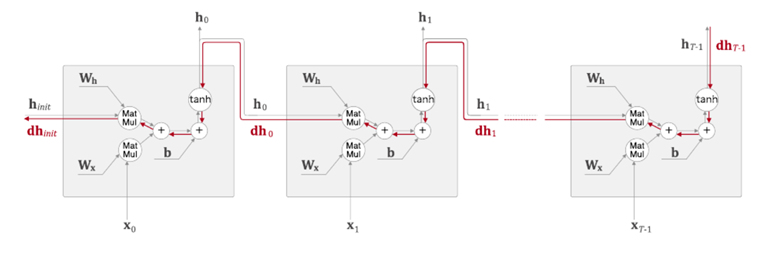

## 기울기 소실

### tanh 노드

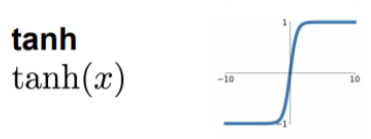

saturation 문제가 있어 kill gradient함 <br>
역전파에서는 기울기가 tanh 노드를 지날 때마다 값은 계속 작아짐

### Matmul 노드 

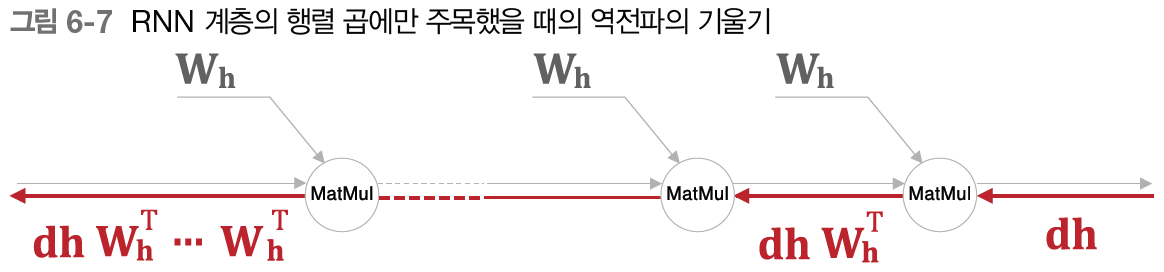

Wh가 작은 수일 경우, 위에서 내려오는 기울기에 행렬 Wh를 T번 반복해서 곱했기에 기울기가 지수적으로 감소한다.<Br>
기울기가 일정 수준 이하로 작아지면 가중치 매개변수가 더 이상 갱신되지 않으므로 장기 의존 관계를 학습할 수 없게 된다. <BR>
행렬의 특잇값(데이터가 얼마나 퍼져 있는지)가 1보다 큰지 여부를 보면 기울기 크기가 어떻게 변할지 예측할 수 있다. 

## 기울기 폭발 

### Matmul 노드 

Wh가 큰 수일 경우, 위에서 내려오는 기울기에 행렬 Wh를 T번 반복해서 곱했기에 기울기가 지수적으로 증가한다.<Br>
기울기가 일정 수준 이상으로 커지면 오버플로를 일으켜 NaN 값을 발생시키므로 신경망 학습을 제대로 수행할 수 없게 된다. 

### 대책 : 기울기 클리핑 

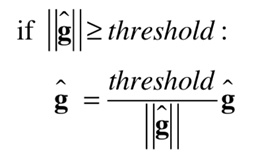

In [3]:
dW1 = np.random.rand(3,3) * 10
dW2 = np.random.rand(3,3) * 10
grads = [dW1, dW2]
max_norm = 5.0 # threshold

def clip_grads(grads, max_norm):
  total_norm = 0
  for grad in grads:
    total_norm += np.sum(grad**2)
  total_norm = np.sqrt(total_norm) # ||g||

  rate = max_norm / (total_norm + 1e-6) # threshold / ||g||
  if rate < 1:
    for grad in grads:
      grad *= rate 

# 기울기 소실과 LSTM

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

LSTM은 장기 종속성을 학습할 수 있는 특별한 종류의 RNN이다. <BR>
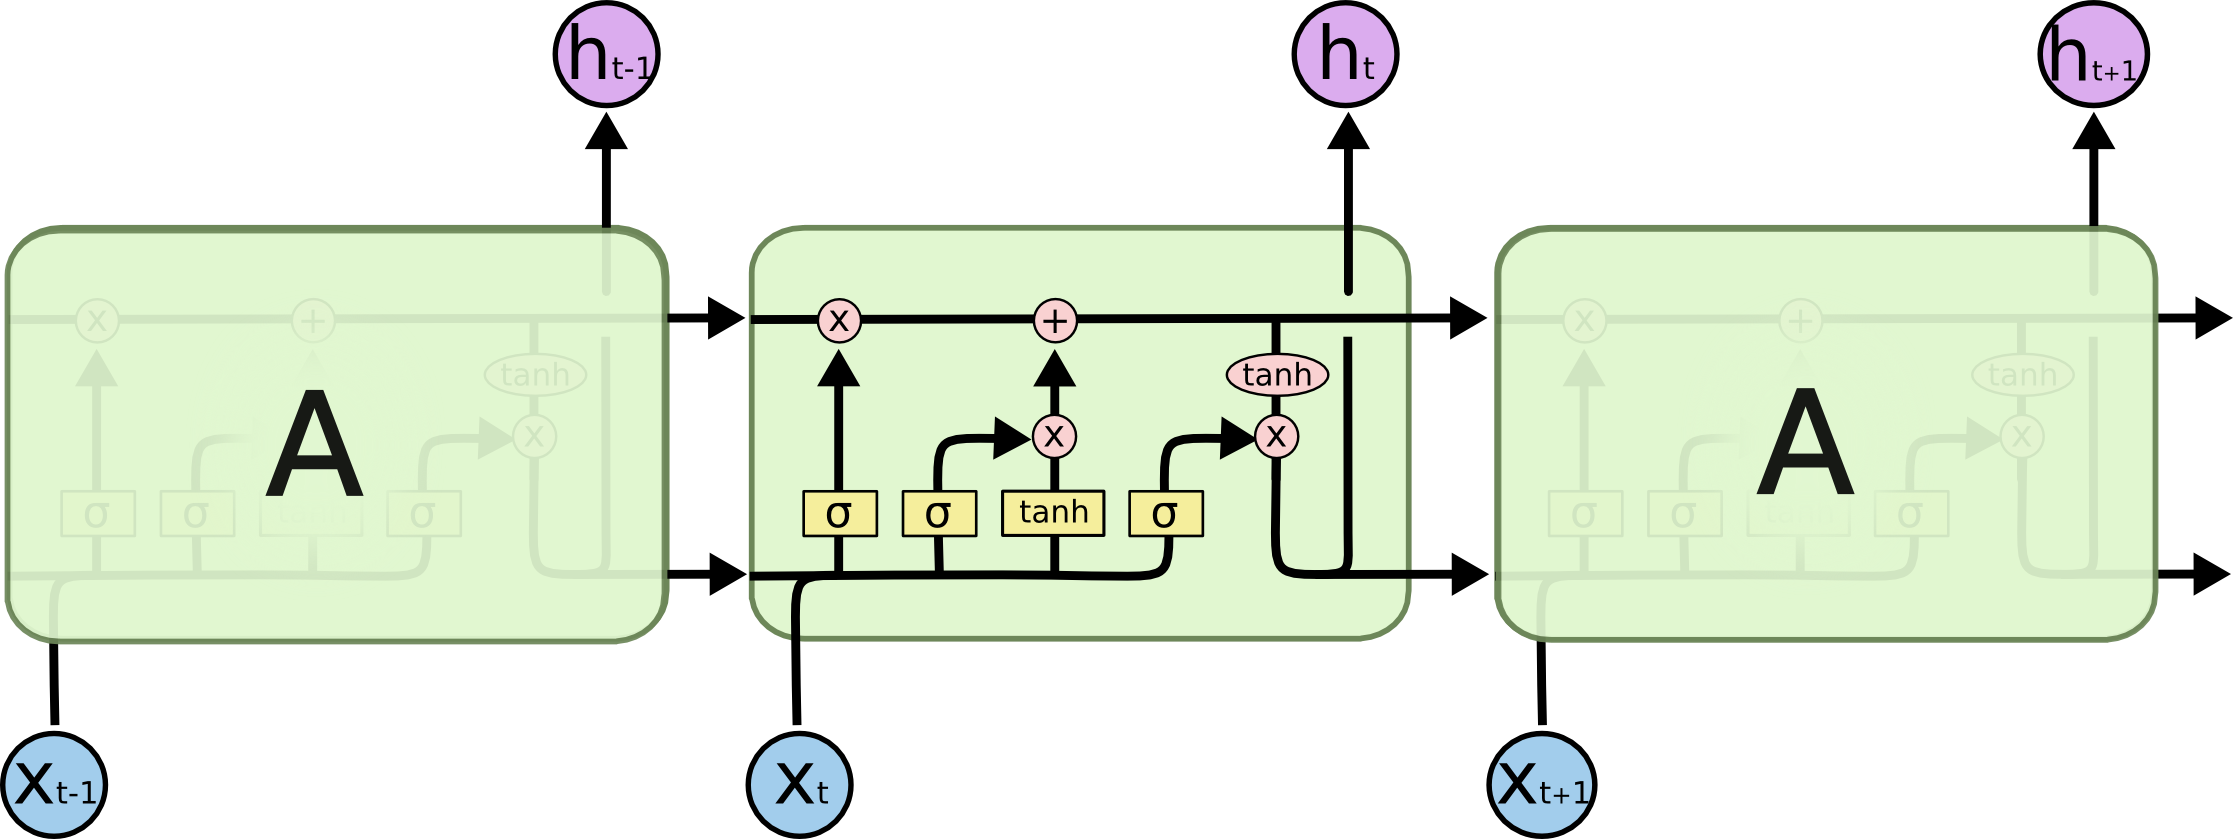

## LSTM의 핵심 아이디어 

### 기억 셀 (셀 상태)
LSTM 전용의 기억 메커니즘으로 데이터를 자기 자신으로만 주고 받으며 다른 계층으로 출력하지 않는다. <BR>
그에 반해 은닉 상태 h는 다른 계층으로 출력된다. <br>
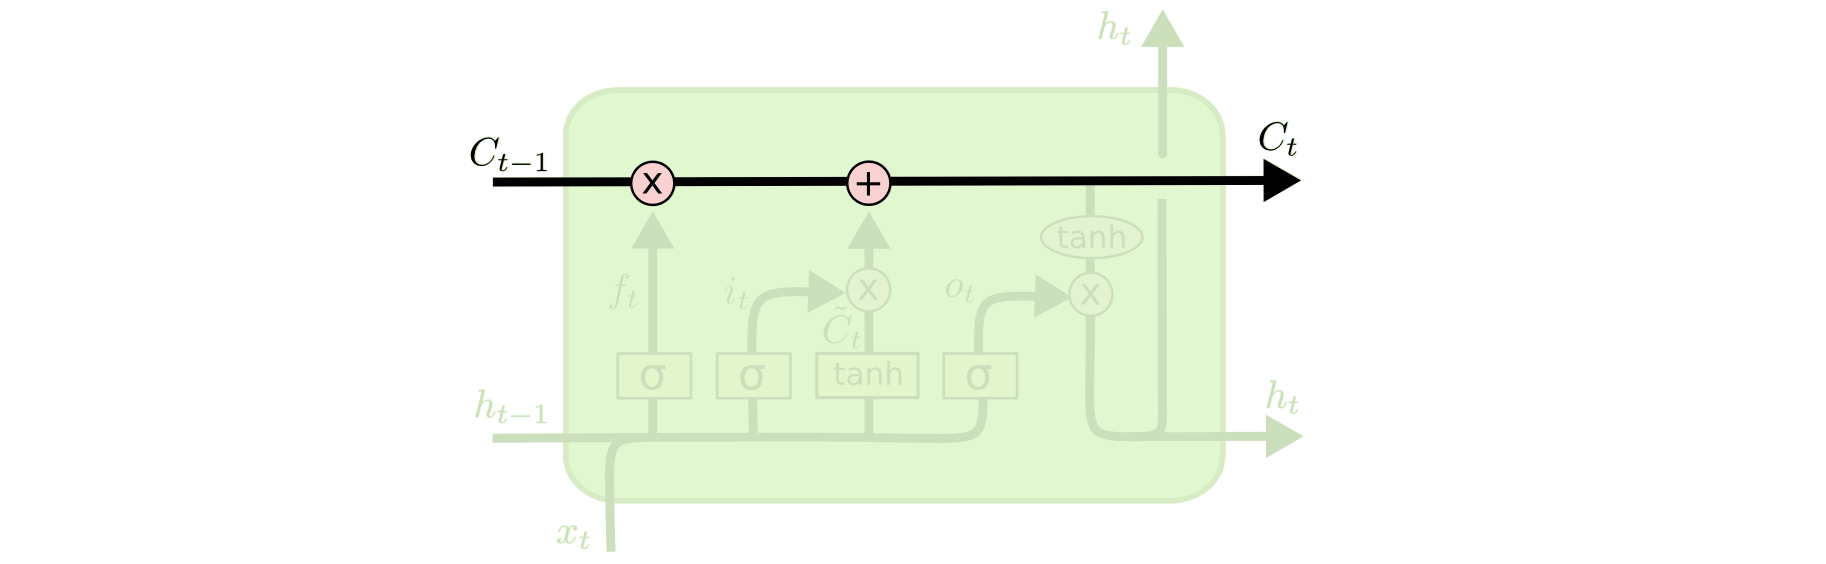

### 게이트 
다음 단계로 흘려보낼 정보의 양을 제어하는 방법이다. <br>
신중하게 조절되는 셀 상태에 정보를 제거하거나 추가할 수 있는 기능이 있다. <br>
시그모이드 신경망 레이어와 점별 곱셈 연산을 구성이 되어 있는데 시그모이드 함수의 출력이 0과 1 사이의 실수이기에 데이터를 얼마만큼 통과시킬지를 정하는 비율을 나타낸다. (0은 아무것도 통과시키지 않음, 1은 모든 것을 통과시킴) <br>
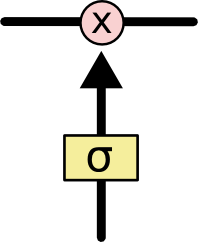

## forget 게이트 

기억 셀의 어느 부분을 잊어야 하는지 제어하는 역할을 수행하는 게이트 <BR>
결과값이 0에 가까울수록 많이 삭제, 1에 가까울수록 온전한 상태를 나타낸다. 

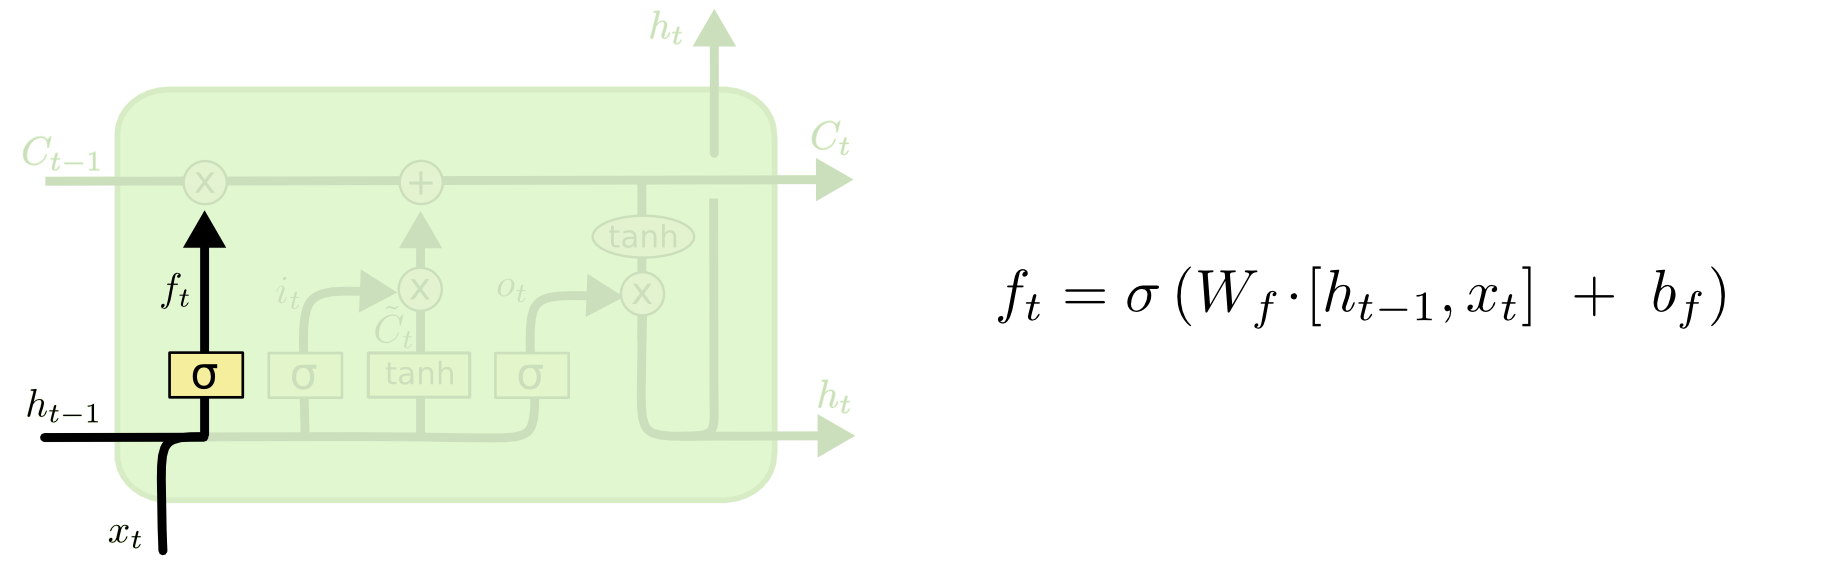

## input 게이트 

새로운 정보를 기억 셀에 반영하는 역할을 수행하는 게이트 <br>
아래 식에서 Ct는 기억 셀에 추가하는 새로운 기억을 나타낸다. it는 이 ct가 이전 시각의 기억 셀 ct-1에 얼마나 추가될지를 판단한다. <br>
따라서 Ct의 각 원소가 새로 추가되는 정보로써의 가치가 얼마나 큰 지를 판단한다. 

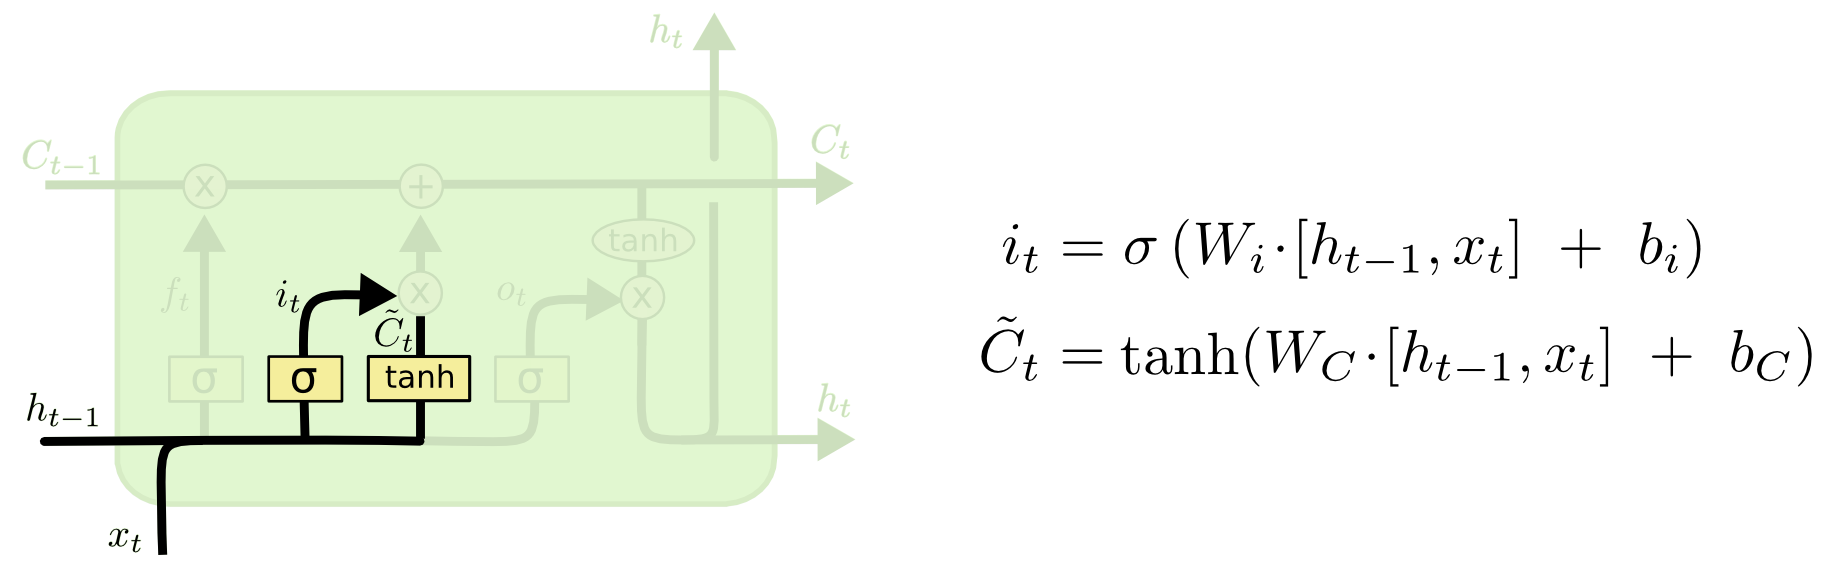

tanh 함수의 출력은 -1.0 ~ 1.0의 실수로 그 안에 인코딩된 정보의 강약(정도)를 표시한다.<br>
시그모이드 함수의 출력은 0~1의 실수로 데이터를 얼마만큼 통과시킬지를 정하는 비율을 뜻한다.<br>
따라서 게이트에서는 시그모이드 함수가, 실질적인 정보를 지니는 데이터에는 tanh 함수가 활성화 함수로 사용된다. 

## 기억 셀(셀 상태) 업데이트 

필요없는 장기 기억은 잊고 새로운 정보는 기억한다. <br>
forget gate와 input gate를 이용하여 업데이트한다. 

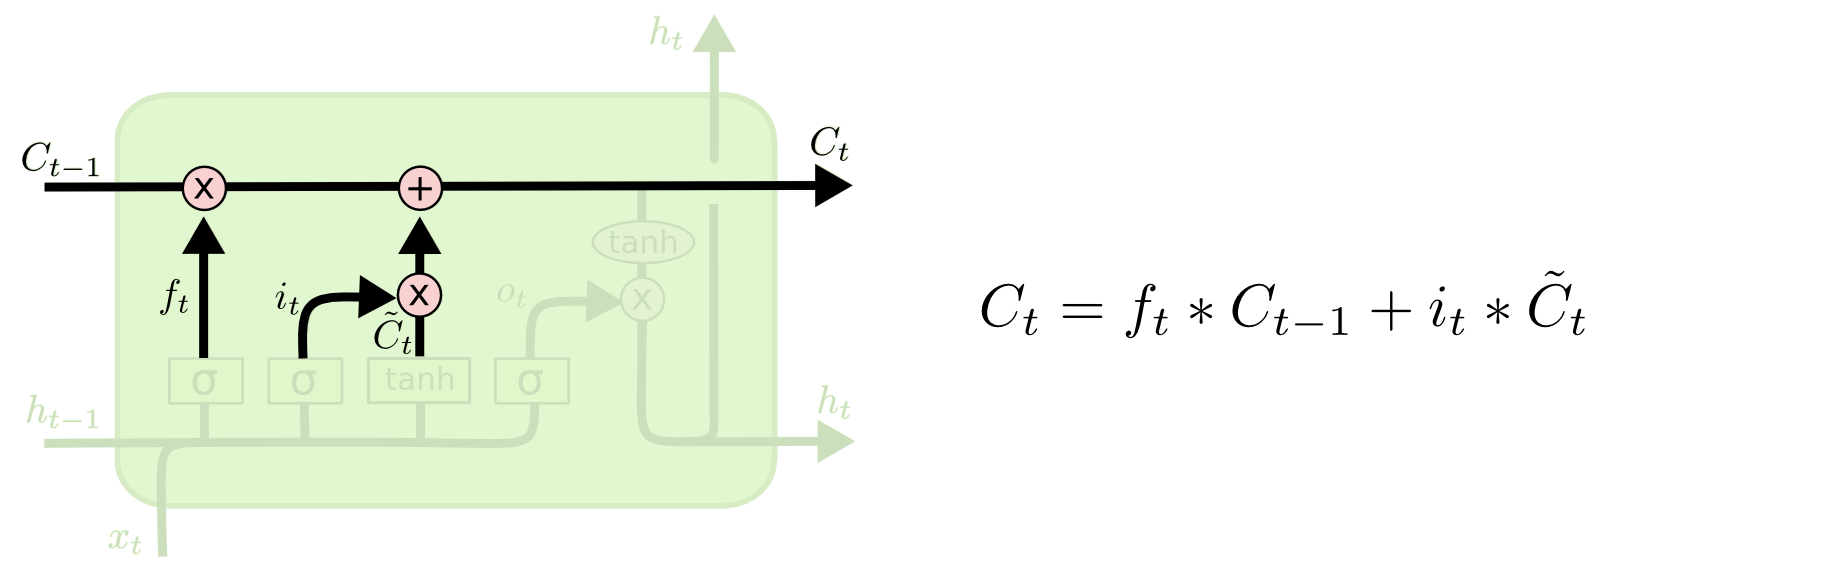

## output 게이트 

다음 은닉 상태 ht의 출력을 담당하는 게이트 <br>tanh(ct)의 각 원소에 대해 '그것이 다음 시각의 은닉 상태에 얼마나 중요한가'를 조정한다.<br>
게이트의 출력과 기억 셀에 tanh를 적용한 결과에 원소별 곱(아다마르 곱) 수행 

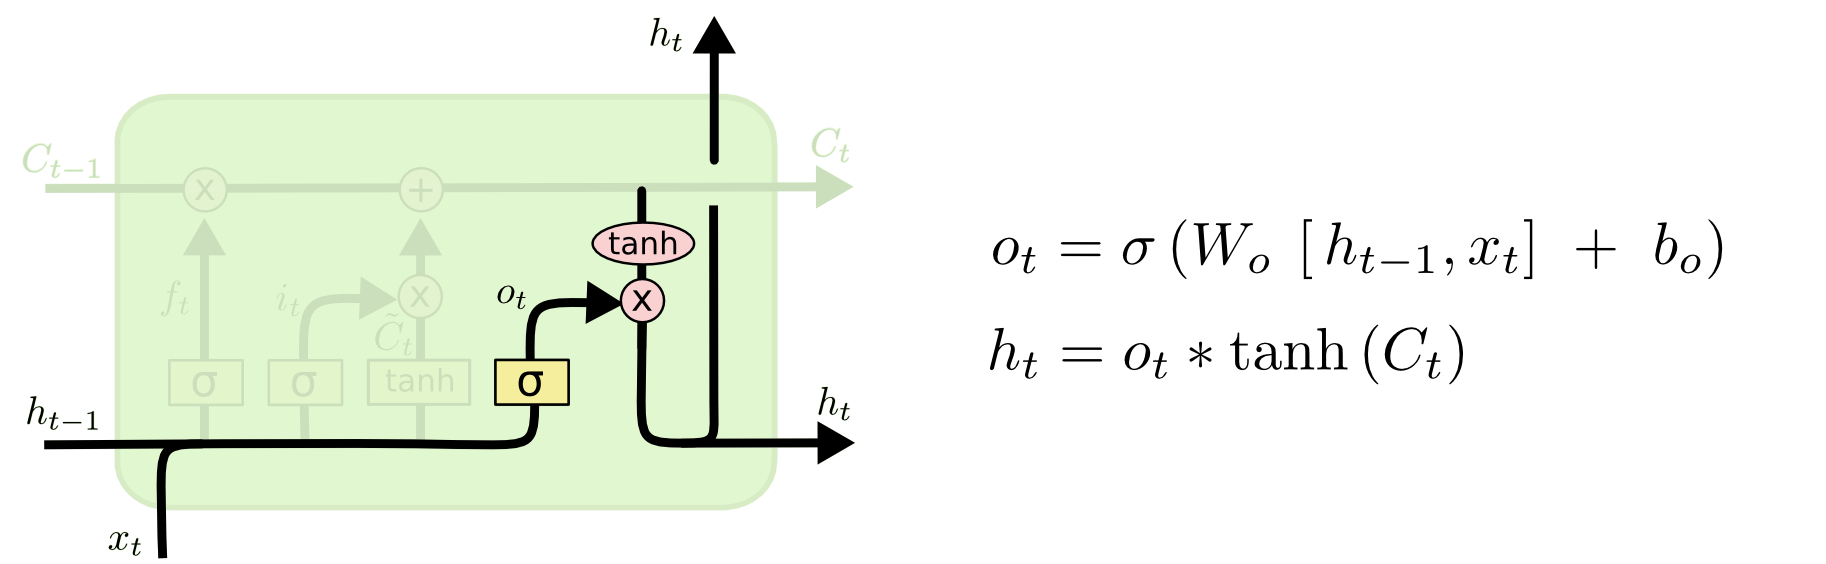

## LSTM의 기울기 흐름 

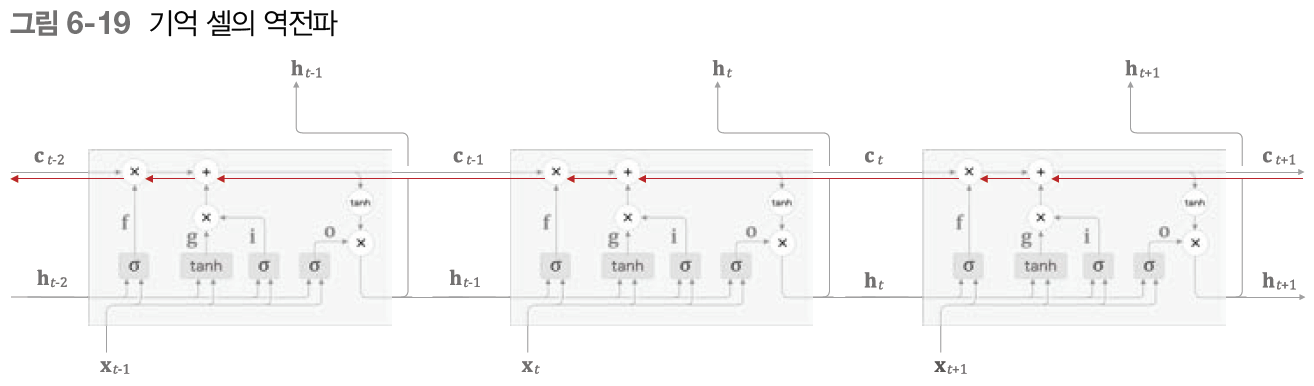

- 기억 셀의 역전파에서는 '+'와 'x' 노드만을 지나게 된다. 
- '+' 노드는 상류에서 전해지는 기울기를 그대로 흘릴 뿐이다. 따라서 기울기 변화(감소)는 일어나지 않는다.
- 'x' 노드는 '행렬 곱'이 아닌 '아마다르 곱'을 수행한다. '행렬 곱'은 곱셈의 효과가 누적되기에 기울기 소실이 일어나지만 '아마다르 곱'은 매번 새로운 게이트 값을 이용하므로 곱셈의 효과가 누적되지 않아 기울기 소실이 일어나지 않는다. 
- forget 게이트가 '잊어야 한다'고 판단한 기억 셀의 원소에 대해서는 기울기가 작아진다. 한편 forget 게이트가 '잊어서는 안 된다'고 판단한 원소에 대해서는 그 기울기가 약화되지 않은 채로 과거 방향으로 전해진다. 

# LSTM 구현 

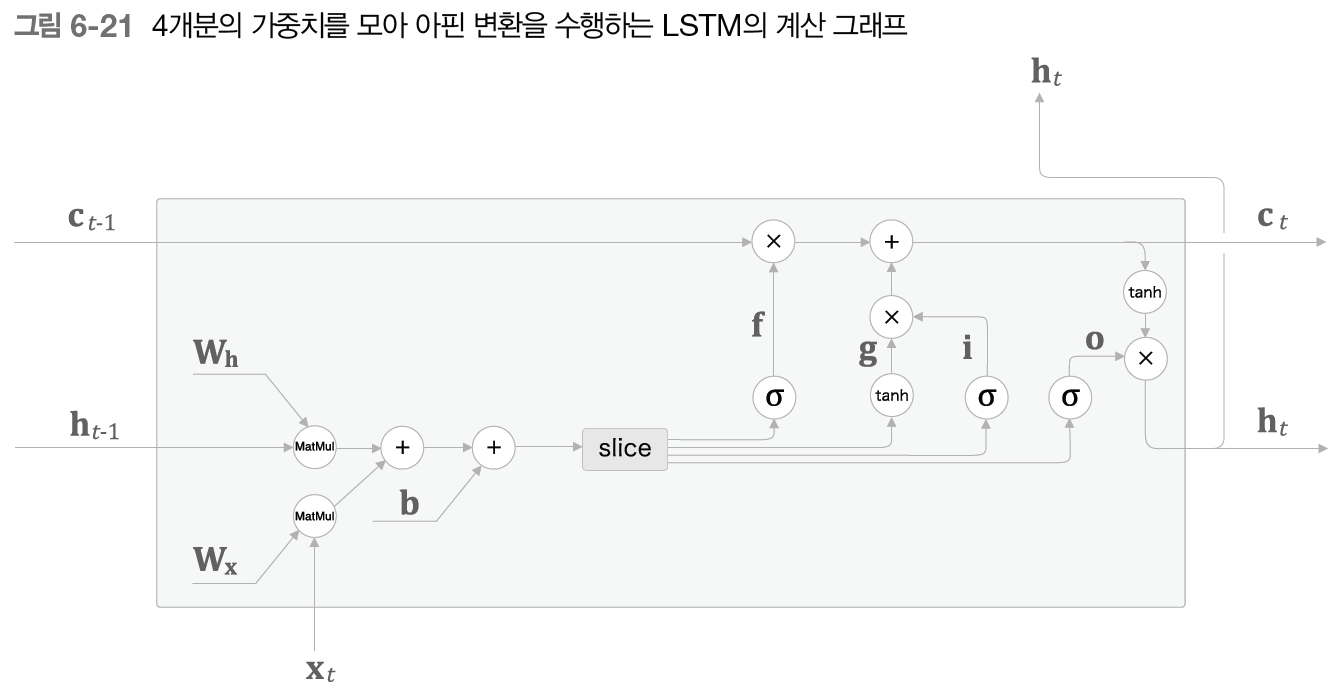

In [4]:
import sys
sys.path.append('..')
from common.np import *
from common.layers import *
from common.functions import sigmoid

class LSTM:
  def __init__(self, Wx, Wh, b):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.cache = None
  
  def forward(self, x, h_prev, c_prev):
    Wx, Wh, b = self.params
    N, H = h_prev.shape

    A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b

    f = A[:, :H]
    g = A[:, H:2*H]
    i = A[:, 2*H:3*H]
    o = A[:, 3*H:]

    f = sigmoid(f) # forget gate
    g = np.tanh(g) # new data
    i = sigmoid(i) # input gate
    o = sigmoid(o) # output gate

    c_next = f * c_prev + g * i
    h_next = o * np.tanh(c_next)

    self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
    return h_next, c_next

  def backward(self, dh_next, dc_next):
    Wx, Wh, b = self.params
    x, h_prev, c_prev ,i, f, g, o, c_next = self.cache

    tanh_c_next = np.tanh(c_next)

    ds = dc_next + (dh_next * o) * (1-tanh_c_next ** 2) # h_next = o * np.tanh(c_next)

    dc_prev = ds * f

    di = ds * g
    df = ds * c_prev
    do = dh_next * tanh_c_next
    dg = ds * i

    di *= i * (1 - i)
    df *= f * (1 - f)
    do *= o * (1 - o)
    dg *= (1 - g ** 2)
    
    dA = np.hstack((df, dg, di, do))
    
    dWh = np.dot(h_prev.T, dA)
    dWx = np.dot(x.T, dA)
    db = dA.sum(axis=0)
    
    self.grads[0][...] = dWx
    self.grads[1][...] = dWh
    self.grads[2][...] = db
    
    dx = np.dot(dA, Wx.T)
    dh_prev = np.dot(dA, Wh.T)
    
    return dx, dh_prev, dc_prev


## Time LSTM 구현 

In [5]:
class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None
        
        self.h, self.c = None, None
        self.dh = None
        self.stateful = stateful
        
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        dh, dc = 0, 0

        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        return dxs

    def set_state(self, h, c=None):
        self.h, self.c = h, c

    def reset_state(self):
        self.h, self.c = None, None

# LSTM을 이용한 언어 모델 

In [6]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.base_model import BaseModel


class Rnnlm(BaseModel):
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs):
        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.lstm_layer.reset_state()

| 에폭 1 |  반복 1 / 1327 | 시간 0[s] | 퍼플렉서티 9999.31
| 에폭 1 |  반복 21 / 1327 | 시간 5[s] | 퍼플렉서티 2889.71
| 에폭 1 |  반복 41 / 1327 | 시간 9[s] | 퍼플렉서티 1219.97
| 에폭 1 |  반복 61 / 1327 | 시간 13[s] | 퍼플렉서티 950.84
| 에폭 1 |  반복 81 / 1327 | 시간 19[s] | 퍼플렉서티 778.15
| 에폭 1 |  반복 101 / 1327 | 시간 23[s] | 퍼플렉서티 656.66
| 에폭 1 |  반복 121 / 1327 | 시간 26[s] | 퍼플렉서티 625.74
| 에폭 1 |  반복 141 / 1327 | 시간 32[s] | 퍼플렉서티 608.67
| 에폭 1 |  반복 161 / 1327 | 시간 35[s] | 퍼플렉서티 584.61
| 에폭 1 |  반복 181 / 1327 | 시간 39[s] | 퍼플렉서티 585.59
| 에폭 1 |  반복 201 / 1327 | 시간 44[s] | 퍼플렉서티 496.66
| 에폭 1 |  반복 221 / 1327 | 시간 48[s] | 퍼플렉서티 486.35
| 에폭 1 |  반복 241 / 1327 | 시간 52[s] | 퍼플렉서티 444.67
| 에폭 1 |  반복 261 / 1327 | 시간 57[s] | 퍼플렉서티 460.70
| 에폭 1 |  반복 281 / 1327 | 시간 61[s] | 퍼플렉서티 451.52
| 에폭 1 |  반복 301 / 1327 | 시간 65[s] | 퍼플렉서티 397.00
| 에폭 1 |  반복 321 / 1327 | 시간 69[s] | 퍼플렉서티 347.34
| 에폭 1 |  반복 341 / 1327 | 시간 73[s] | 퍼플렉서티 395.16
| 에폭 1 |  반복 361 / 1327 | 시간 77[s] | 퍼플렉서티 408.48
| 에폭 1 |  반복 381 / 1327 | 시간 81[s] | 퍼플렉서티 330.18
| 에폭 1

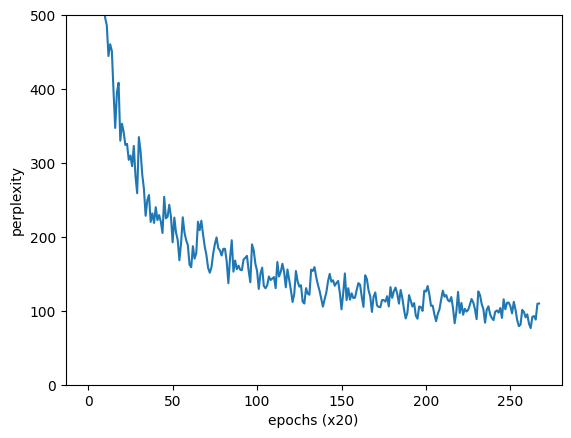

퍼플렉서티 평가 중 ...
234 / 235
테스트 퍼플렉서티:  135.33926769205883


In [8]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb


# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 35     # RNN을 펼치는 크기
lr = 20.0
max_epoch = 4
max_grad = 0.25

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

# 모델 생성
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 기울기 클리핑을 적용하여 학습
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20)
trainer.plot(ylim=(0, 500))

# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)

# 매개변수 저장
model.save_params()

# RNNLM 추가 개선 

In [9]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.np import *  # import numpy as np
from common.base_model import BaseModel


class BetterRnnlm(BaseModel):
    '''
     LSTM 계층을 2개 사용하고 각 층에 드롭아웃을 적용한 모델이다.
     아래 [1]에서 제안한 모델을 기초로 하였고, [2]와 [3]의 가중치 공유(weight tying)를 적용했다.
     [1] Recurrent Neural Network Regularization (https://arxiv.org/abs/1409.2329)
     [2] Using the Output Embedding to Improve Language Models (https://arxiv.org/abs/1608.05859)
     [3] Tying Word Vectors and Word Classifiers (https://arxiv.org/pdf/1611.01462.pdf)
    '''
    def __init__(self, vocab_size=10000, wordvec_size=650,
                 hidden_size=650, dropout_ratio=0.5):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx1 = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh1 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b1 = np.zeros(4 * H).astype('f')
        lstm_Wx2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_Wh2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b2 = np.zeros(4 * H).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.layers = [
            TimeEmbedding(embed_W),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful=True),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful=True),
            TimeDropout(dropout_ratio),
            TimeAffine(embed_W.T, affine_b)  # weight tying!!
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layers = [self.layers[2], self.layers[4]]
        self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs, train_flg=False):
        for layer in self.drop_layers:
            layer.train_flg = train_flg

        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts, train_flg=True):
        score = self.predict(xs, train_flg)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        for layer in self.lstm_layers:
            layer.reset_state()

In [12]:
%matplotlib inline
import sys
sys.path.append('..')
from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ==============================================
config.GPU = True
# ==============================================
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity, to_gpu
from dataset import ptb


# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 650
hidden_size = 650
time_size = 35
lr = 20.0
max_epoch = 3
max_grad = 0.25
dropout = 0.5

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_test, _, _ = ptb.load_data('test')

# if config.GPU:
#     corpus = to_gpu(corpus)
#     corpus_val = to_gpu(corpus_val)
#     corpus_test = to_gpu(corpus_test)

vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

best_ppl = float('inf')
for epoch in range(max_epoch):
    trainer.fit(xs, ts, max_epoch=1, batch_size=batch_size,
                time_size=time_size, max_grad=max_grad)

    model.reset_state()
    ppl = eval_perplexity(model, corpus_val)
    print('검증 퍼플렉서티: ', ppl)

    if best_ppl > ppl:
        best_ppl = ppl
        model.save_params()
    else:
        lr /= 4.0
        optimizer.lr = lr

    model.reset_state()
    print('-' * 50)


# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)

| 에폭 1 |  반복 1 / 1327 | 시간 2[s] | 퍼플렉서티 10000.21
| 에폭 1 |  반복 21 / 1327 | 시간 44[s] | 퍼플렉서티 3838.02
| 에폭 1 |  반복 41 / 1327 | 시간 86[s] | 퍼플렉서티 1847.02
| 에폭 1 |  반복 61 / 1327 | 시간 127[s] | 퍼플렉서티 1380.54
| 에폭 1 |  반복 81 / 1327 | 시간 167[s] | 퍼플렉서티 1011.83
| 에폭 1 |  반복 101 / 1327 | 시간 209[s] | 퍼플렉서티 871.03
| 에폭 1 |  반복 121 / 1327 | 시간 250[s] | 퍼플렉서티 825.04
| 에폭 1 |  반복 141 / 1327 | 시간 291[s] | 퍼플렉서티 708.97
| 에폭 1 |  반복 161 / 1327 | 시간 333[s] | 퍼플렉서티 675.23
| 에폭 1 |  반복 181 / 1327 | 시간 375[s] | 퍼플렉서티 701.91
| 에폭 1 |  반복 201 / 1327 | 시간 417[s] | 퍼플렉서티 597.56
| 에폭 1 |  반복 221 / 1327 | 시간 458[s] | 퍼플렉서티 584.38
| 에폭 1 |  반복 241 / 1327 | 시간 500[s] | 퍼플렉서티 534.35
| 에폭 1 |  반복 261 / 1327 | 시간 541[s] | 퍼플렉서티 551.81
| 에폭 1 |  반복 281 / 1327 | 시간 583[s] | 퍼플렉서티 524.80
| 에폭 1 |  반복 301 / 1327 | 시간 625[s] | 퍼플렉서티 453.37
| 에폭 1 |  반복 321 / 1327 | 시간 667[s] | 퍼플렉서티 398.83
| 에폭 1 |  반복 341 / 1327 | 시간 709[s] | 퍼플렉서티 452.73
| 에폭 1 |  반복 361 / 1327 | 시간 750[s] | 퍼플렉서티 468.59
| 에폭 1 |  반복 381 / 1327 | 시간 792[s]

KeyboardInterrupt: ignored